# 🧠 Stroke Risk Prediction Using Machine Learning

## Step 1: Data Loading and Initial Exploration

## Project Overview

**Domain:** Healthcare Analytics & Predictive Modeling

**Objective:**  
This project focuses on analyzing patient demographic, clinical, and lifestyle data to predict the risk of stroke using machine learning techniques. The goal is to support early identification of high-risk individuals and enable data-driven healthcare decisions.

**Problem Statement:**  
Stroke is one of the leading causes of death and long-term disability worldwide. Due to its sudden onset and severe consequences, early identification of individuals at high risk is essential for timely medical intervention and preventive healthcare planning.

Traditional medical assessments may not always efficiently identify stroke risk at an early stage. Therefore, there is a need for an automated and data-driven approach that can analyze multiple patient attributes simultaneously to estimate stroke risk accurately.


**Why This Project Matters:**  

- Enables early detection of stroke risk  
- Supports preventive and personalized healthcare planning  
- Assists healthcare professionals with data-driven insights  
- Demonstrates practical application of machine learning in healthcare  

## 📊 Dataset Description

The dataset used in this project is the Stroke Prediction Dataset, which contains **5,110 patient records** with **12 features** related to demographic information, medical conditions, and lifestyle habits.

- Number of records: 5,110  
- Number of features: 12  

The dataset includes attributes such as age, gender, hypertension, heart disease, average glucose level, BMI, and smoking status, which are relevant for assessing stroke risk.


## 🔍 Phase 1: Data Loading and Initial Understanding

This phase focuses on importing the dataset, examining its structure, and understanding the basic characteristics of the data before performing preprocessing or model building.

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np

# Display settings for pandas
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.float_format', '{:.2f}'.format)  # Format decimals to 2 places

print("Libraries imported successfully!")

Libraries imported successfully!


## 1.1 Dataset Source and Loading Method

**Data Source:** Kaggle – Stroke Prediction Dataset  
**Source Link:** https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset   

### Loading Objectives
The dataset will be loaded from a CSV file and initially examined to understand:
- The total number of records (rows), representing individual patients  
- The total number of features (columns), representing patient attributes  
- Feature names along with their corresponding data types  
- The overall structure and quality of the dataset  

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Display dataset dimensions
print("Dataset loaded successfully!")
print("=" * 100)
print(f"Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

Dataset loaded successfully!
Dataset Shape: 5,110 rows × 12 columns


## 1.2 Data Cleaning and Pre-processing

Before performing exploratory analysis or building models, the dataset must be cleaned and prepared. Real-world data often contains missing values, inconsistencies, and formatting issues that can affect results.

This section focuses on improving data quality by handling missing values, checking for duplicate records, verifying data types, and applying basic transformations. These steps ensure the dataset is reliable and suitable for further analysis.

## 1.3 Dataset Information

Understanding the dataset structure helps in deciding how the data should be processed and analyzed. It provides clarity on the number of observations, the type of features present, and the role of each column.

The stroke prediction dataset contains demographic, health-related, and lifestyle information for individuals. Each row represents one individual, while each column corresponds to a specific attribute.

The target variable in this dataset is **stroke**, which indicates whether an individual has experienced a stroke. This variable is binary in nature, where:
- 0 represents no stroke
- 1 represents occurrence of stroke

All other columns act as input features that contribute to predicting the target outcome.


## 1.4 Preview of Dataset (First 10 Records)

Before starting detailed cleaning and analysis, it is useful to view a small portion of the dataset. Displaying the first few records helps in understanding the overall structure, column arrangement, and the type of values stored in each feature.

In this project, the first 10 rows of the dataset are displayed to get an initial overview of the data.

In [3]:
# Display the first 10 rows of the dataset
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
5,56669,Male,81.00,0,0,Yes,Private,Urban,186.21,29.00,formerly smoked,1
6,53882,Male,74.00,1,1,Yes,Private,Rural,70.09,27.40,never smoked,1
7,10434,Female,69.00,0,0,No,Private,Urban,94.39,22.80,never smoked,1
8,27419,Female,59.00,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.00,0,0,Yes,Private,Urban,58.57,24.20,Unknown,1


## 1.5 Dataset Information and Data Types

Examining the data types of each feature helps in understanding how the dataset can be processed and analyzed. Different data types require different handling techniques, especially when preparing the data for analysis or modeling.

Reviewing data types is useful for:
- Recognizing features that may need conversion or encoding
- Choosing suitable statistical and visualization methods
- Identifying missing or incomplete values
- Understanding how efficiently the dataset uses memory

The dataset contains a combination of numerical health indicators and categorical personal attributes. The target variable, stroke, is represented as a numeric value, making it suitable for classification-based analysis.

To summarize this information, a dataset overview function is used to display the structure, data types, and completeness of the data.

In [4]:
# Show structural details of the dataset
print("Stroke Dataset Overview")
print("-" * 60)
df.info()

Stroke Dataset Overview
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# Correct data types for numerical columns
df['age'] = df['age'].astype(int)
df['bmi'] = df['bmi'].astype(float)
df['avg_glucose_level'] = df['avg_glucose_level'].astype(float)

In [6]:
# Standardize categorical values (remove spaces and capitalize first letter)
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = df[col].str.strip().str.capitalize()

In [7]:
# Column names are reformatted by replacing underscores with spaces and capitalizing each word to improve readability and presentation.
df.columns = (
    df.columns
    .str.replace('_', ' ')
    .str.title()
)

## 1.6 Missing Value Analysis

Missing data is a common issue in real-world datasets and can affect the reliability of analysis if ignored. Identifying missing values early helps in choosing the most suitable method to handle them.

In the stroke prediction dataset, missing values are examined to determine which features require attention and how they should be treated without distorting the overall data distribution.

In [8]:
# Check for missing values in all columns
print("Missing Values Summary:")
missing_values = df.isnull().sum()
print(missing_values)
print("="*70)

# Columns with missing values
if missing_values.sum() > 0:
    print("\nColumns with missing values:")
    print(missing_values[missing_values > 0])
else:
    print("\nNo missing values found in the dataset.")

Missing Values Summary:
Id                     0
Gender                 0
Age                    0
Hypertension           0
Heart Disease          0
Ever Married           0
Work Type              0
Residence Type         0
Avg Glucose Level      0
Bmi                  201
Smoking Status         0
Stroke                 0
dtype: int64

Columns with missing values:
Bmi    201
dtype: int64


The BMI feature contains missing values. Since BMI is a numerical variable related to health measurements, replacing missing values with a central tendency measure helps maintain data consistency.

The median is chosen instead of the mean to reduce the influence of extreme values.

In [9]:
# Fill missing BMI values using the median
df['Bmi'] = df['Bmi'].fillna(df['Bmi'].median())

After handling the missing values, the dataset is checked again to ensure that all missing entries have been addressed successfully.

In [10]:
# Verify that missing values are handled
df.isnull().sum() 

Id                   0
Gender               0
Age                  0
Hypertension         0
Heart Disease        0
Ever Married         0
Work Type            0
Residence Type       0
Avg Glucose Level    0
Bmi                  0
Smoking Status       0
Stroke               0
dtype: int64

## 1.7 Duplicate Record Analysis

Duplicate records can lead to biased analysis by repeating the same information multiple times. Therefore, the dataset is checked for duplicate rows to ensure that each record represents a unique individual.

In [11]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print(f"\nWarning: {duplicates} duplicate row(s) detected!")
else:
    print("\nNo duplicate rows found in the dataset.")

Number of duplicate rows: 0

No duplicate rows found in the dataset.


## Phase 1: Analysis Summary

### Overview of the Dataset
- **Number of Records:** 5,110 patients  
- **Features Included:** 12 attributes  
- **Outcome Variable:** `stroke` (occurrence rate: 4.9%)  

### Patient Demographics and Profile
- **Mean Age:** 43 years (range: 0–82)  
- **Average BMI:** 28.9 (with some missing entries)  
- Many patients show low physical activity and have conditions like hypertension or heart disease  
- **Gender Breakdown:** fairly balanced between male and female  

### Data Quality Assessment

- **Missing Data:**  
  - BMI: 201 entries missing (~3.9%)  
  - Smoking status: 2 entries missing (~0.04%)  

- **Duplicate Entries:**  
  - No complete duplicates found  

- **Data Type Considerations:**  
  - `bmi` recorded as text instead of numeric  
  - Categorical variables such as `gender`, `ever_married`, and `work_type` need proper encoding  

- **Inconsistencies in Values:**  
  - `smoking_status` has multiple categories such as “formerly smoked”, “never smoked”, and “Unknown” that require standardization  

### Key Takeaways
- Stroke occurrence is low (4.9%), suggesting an imbalanced dataset; this must be addressed during modeling  
- Factors such as age, BMI, and comorbidities (hypertension, heart disease) are likely influential  
- Lifestyle aspects, including smoking habits and physical activity, could also impact stroke risk  

## Phase 3: Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is conducted to understand the structure of the dataset, analyze variable distributions, and identify relationships between features and the target variable (stroke).  
This phase includes univariate, bivariate, and multivariate analysis supported by statistical summaries and visualizations.

## Import Required Libraries

The following libraries are used for data manipulation, numerical analysis, and data visualization.

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)

## Variables Used for Analysis

**Target Variable**
- stroke

**Numerical Variables**
- age
- avg_glucose_level
- bmi

**Categorical Variables**
- gender
- hypertension
- heart_disease
- smoking_status
- work_type
- Residence_type

## Dataset Overview

Basic inspection is performed to understand the data structure and summary statistics.

df.head()

In [14]:
df.describe()

,Id,Age,Hypertension,Heart Disease,Avg Glucose Level,Bmi,Stroke
count,5110.00,5110.00,5110.00,5110.00,5110.00,5110.00,5110.00
mean,36517.83,43.22,0.10,0.05,106.15,28.86,0.05
std,21161.72,22.63,0.30,0.23,45.28,7.70,0.22
min,67.00,0.00,0.00,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.00,0.00,77.25,23.80,0.00
50%,36932.00,45.00,0.00,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.00,0.00,114.09,32.80,0.00
max,72940.00,82.00,1.00,1.00,271.74,97.60,1.00


### Univariate Analysis

Univariate analysis focuses on examining a single variable at a time.  
It helps understand the distribution, frequency, and spread of individual features in the dataset.

#### Distribution of Age – Histogram (Univariate)

**Variable Used:** age  

This histogram displays the distribution of ages in the dataset, helping identify dominant age groups.

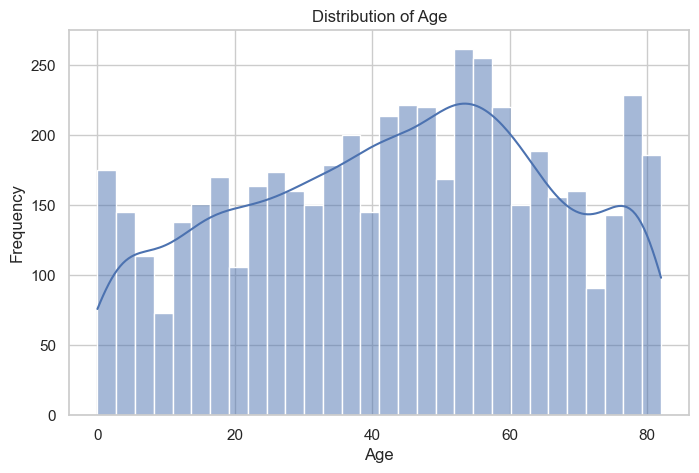

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Insight:**  
Most individuals belong to middle-aged and elderly categories.

#### Gender Distribution – Bar Chart (Univariate)

**Variable Used:** gender  

This bar chart shows the number of individuals across different gender categories.

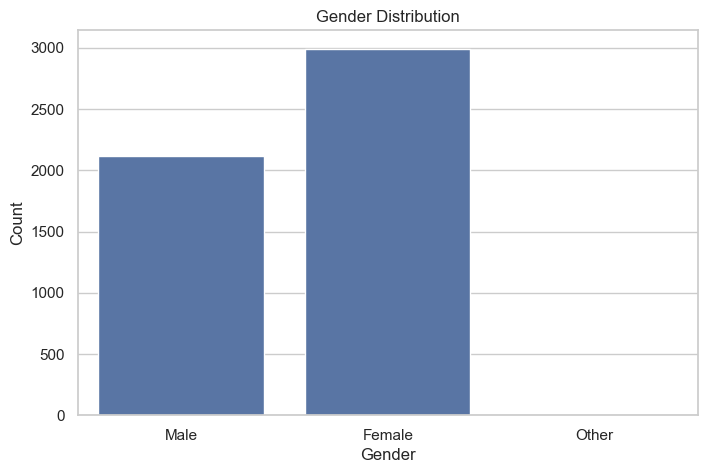

In [35]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**Insight:**  
The dataset has a fairly balanced gender distribution.

#### Stroke Outcome Distribution – Pie Chart (Univariate)

**Variable Used:** stroke  

This pie chart illustrates the proportion of stroke and non-stroke cases.

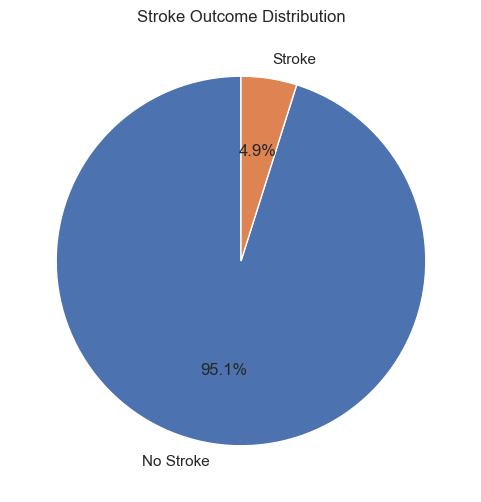

In [36]:
stroke_counts = df['Stroke'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    stroke_counts,
    labels=['No Stroke', 'Stroke'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Stroke Outcome Distribution')
plt.show()

**Insight:**  
Stroke cases form a very small portion of the dataset, indicating class imbalance.

#### BMI Distribution – Histogram (Univariate)

**Variable Used:** bmi  

This histogram shows the distribution of Body Mass Index values.

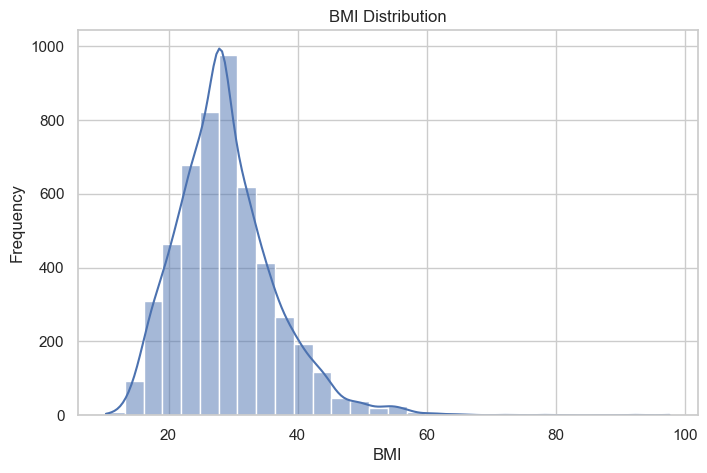

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(df['Bmi'], bins=30, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

**Insight:**  
Most individuals fall within the overweight BMI range.

#### Smoking Status Distribution – Bar Chart (Univariate)

**Variable Used:** smoking_status  

This bar chart shows how individuals are distributed based on smoking habits.

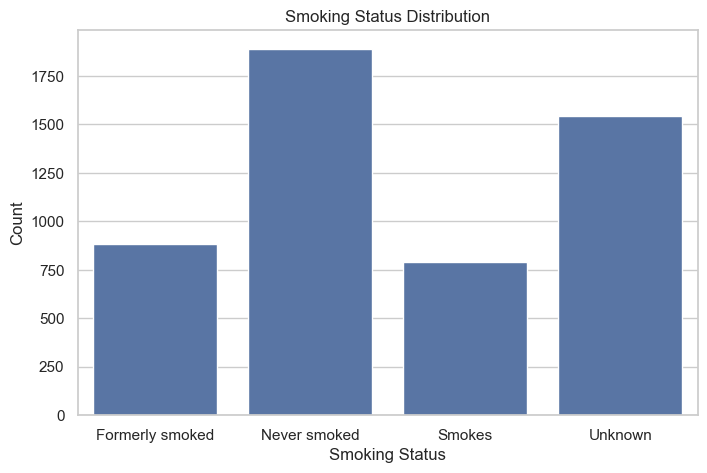

In [40]:
sns.countplot(x='Smoking Status', data=df)
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

**Insight:**  
Non-smokers constitute the majority group.

### Bivariate Analysis

Bivariate analysis examines the relationship between two variables to identify associations with the target variable.

#### Age vs Stroke Outcome – Box Plot (Bivariate)

**Variables Used:** age, stroke  

This box plot compares age distribution between stroke and non-stroke individuals.

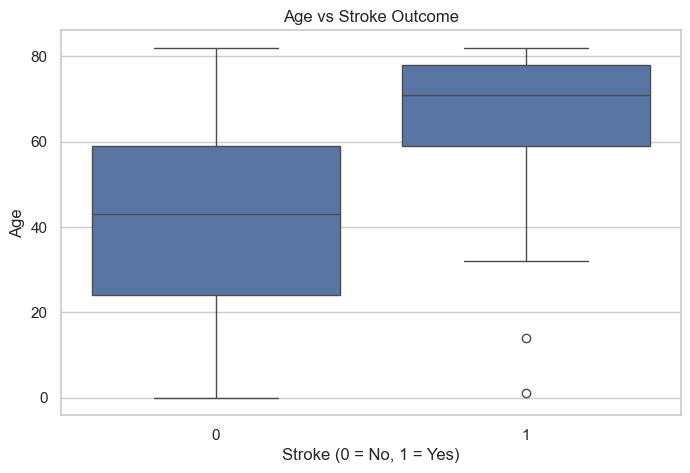

In [41]:
sns.boxplot(x='Stroke', y='Age', data=df)
plt.title('Age vs Stroke Outcome')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

**Insight:**  
Stroke-affected individuals tend to be significantly older.

#### Gender vs Stroke Outcome – Bar Chart (Bivariate)

**Variables Used:** gender, stroke  

This bar chart compares stroke occurrence across genders.

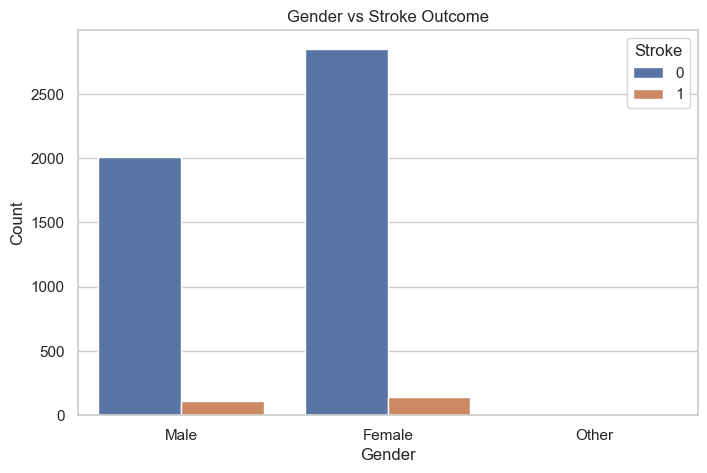

In [42]:
sns.countplot(x='Gender', hue='Stroke', data=df)
plt.title('Gender vs Stroke Outcome')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()

**Insight:**  
Both genders show higher non-stroke cases with slight variation.

#### Average Age by Stroke Outcome – Line Chart (Bivariate)

**Variables Used:** stroke, age  

This line chart shows the trend of average age across stroke categories.

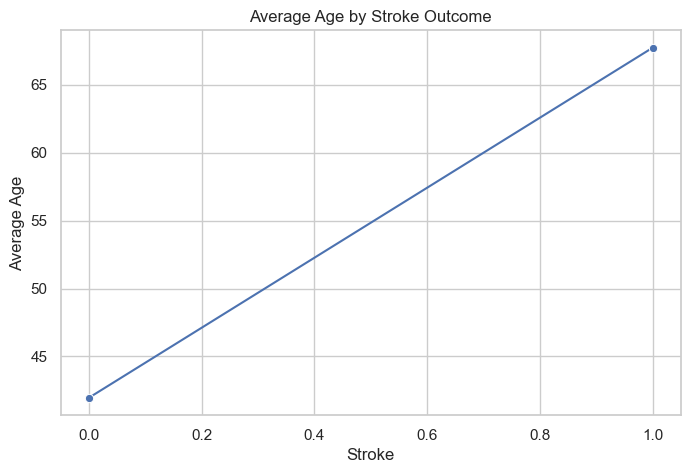

In [44]:
avg_age = df.groupby('Stroke')['Age'].mean().reset_index()

sns.lineplot(x='Stroke', y='Age', data=avg_age, marker='o')
plt.title('Average Age by Stroke Outcome')
plt.xlabel('Stroke')
plt.ylabel('Average Age')
plt.show()

**Insight:**  
Average age is higher among individuals who experienced stroke.

#### Age vs BMI – Scatter Plot (Bivariate)

**Variables Used:** age, bmi  

This scatter plot explores the relationship between age and BMI.

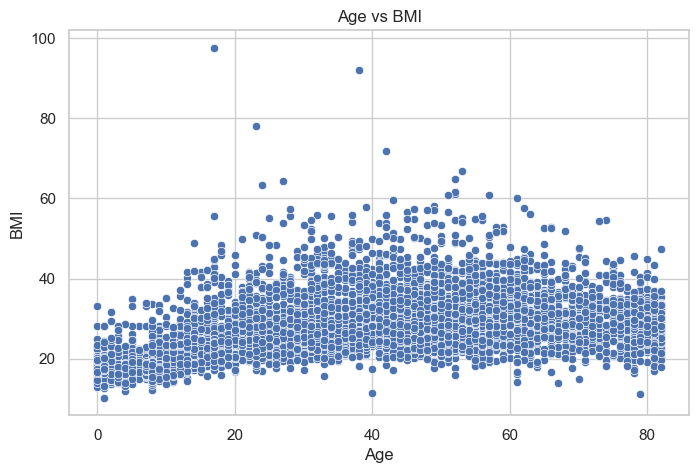

In [45]:
sns.scatterplot(x='Age', y='Bmi', data=df)
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

**Insight:**  
No strong linear relationship is observed between age and BMI.

### Multivariate Analysis

Multivariate analysis explores interactions among more than two variables simultaneously.

#### Correlation Heatmap – Heatmap (Multivariate)

**Variables Used:** age, bmi, avg_glucose_level, stroke  

This heatmap shows correlations among numerical variables.

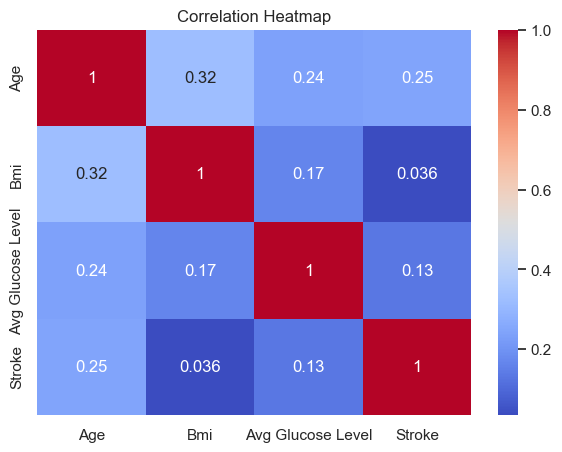

In [46]:
corr = df[['Age', 'Bmi', 'Avg Glucose Level', 'Stroke']].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Insight:**  
Age shows the strongest positive correlation with stroke.

#### Average Glucose Level by Stroke – Bar Chart (Multivariate)

**Variables Used:** avg_glucose_level, stroke  

This chart compares glucose levels across stroke outcomes.

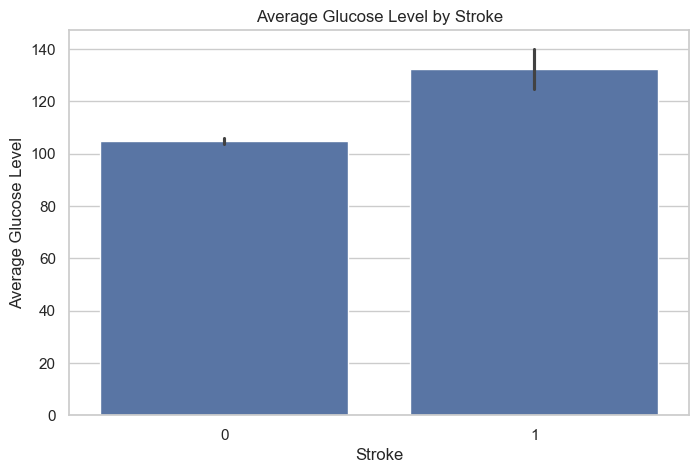

In [47]:
sns.barplot(x='Stroke', y='Avg Glucose Level', data=df)
plt.title('Average Glucose Level by Stroke')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.show()

**Insight:**  
Higher glucose levels are observed among stroke-affected individuals.

## Phase 3 Conclusion

The exploratory data analysis provided a clear understanding of the dataset through
univariate, bivariate, and multivariate analysis.

Univariate analysis revealed the demographic structure and distribution of key variables.
Bivariate analysis identified important relationships, especially between age, glucose
levels, and stroke occurrence. Multivariate analysis confirmed that stroke is influenced
by a combination of age, BMI, and glucose levels rather than a single factor.

Overall, the EDA phase successfully uncovered meaningful patterns and relationships,
laying a strong foundation for predictive modeling and further analysis.